# EDA & PREPROCESSING

### Objective:
#### The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from collections import Counter

In [12]:
# Loading Dataset

df=pd.read_csv("Employee.csv")
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


## Data Exploration

In [14]:
# Data types and count of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [15]:
# The unique values in each feature and find its length.

for col in df.columns:
    unique_value=df[col].unique()
    print(f"Feature:{col}")
    print(f"Unique values:{unique_value}")
    print(f"Length of unique values:{len(unique_value)}")
    print(f"_"*30)

Feature:Company
Unique values:['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of unique values:7
______________________________
Feature:Age
Unique values:[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values:30
______________________________
Feature:Salary
Unique values:[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of unique values:41
______________________________
Feature:Place
Unique values:['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of unique values:12
______________________________
Feature:Country
Unique values:['India']
Length of unique values:1
________________

In [16]:
#  Statistical Analysis of Numerical Features
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [17]:
import os

In [18]:
# Renaming of the columns.
df_new=df.rename(columns={'Age':'Years','Place':'Location'},inplace=True)
df.head()

,Company,Years,Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


## Data Cleaning

In [20]:
# Find the missing and inappropriate values, treat them appropriately

df.isnull().sum()

Company      8
Years       18
Salary      24
Location    14
Country      0
Gender       0
dtype: int64

In [21]:
if 'Years' in df.columns:
    # Check for '0' values that are not already NaN
    zero_age_count = (df['Years'] == 0).sum()
    if zero_age_count > 0:
        df['Years'] = df['Years'].replace(0, np.nan)
        print(f"Replaced {zero_age_count} '0' values in 'Years' with NaN.")
    else:
        print("No '0' values found in 'Years' to replace with NaN.")
else:
    print("'Years' column not found. Skipping '0' replacement.")

Replaced 6 '0' values in 'Years' with NaN.


In [22]:
df.isnull().sum()

Company      8
Years       24
Salary      24
Location    14
Country      0
Gender       0
dtype: int64

In [23]:
print("\n--- Removing Duplicate Rows ---")
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_duplicates = df.shape[0]
print(f"Removed {initial_rows - rows_after_duplicates} duplicate rows.")
print(f"DataFrame now has {rows_after_duplicates} rows.")



--- Removing Duplicate Rows ---
Removed 4 duplicate rows.
DataFrame now has 144 rows.


In [24]:
print("\n--- Outlier Detection (using IQR method for numerical columns) ---")
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
outliers_found = {}

for col in numerical_cols:
    # Skip columns that might be ID-like or have very few unique values if they are not truly numerical for outlier detection
    if col in ['Gender'] and df[col].nunique() <= 2: # Assuming Gender is 0/1 and not a numerical quantity for outliers
        print(f"Skipping outlier detection for '{col}' as it appears to be a binary/categorical column.")
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


--- Outlier Detection (using IQR method for numerical columns) ---
Skipping outlier detection for 'Gender' as it appears to be a binary/categorical column.


In [25]:
# Identify outliers
col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
if not col_outliers.empty:
    outliers_found[col] = col_outliers.tolist()
    print(f"Outliers in '{col}': {len(col_outliers)} values found.")
        # print(f"  Values: {col_outliers.tolist()}") # Uncomment to see the actual outlier values
else:
    print(f"No significant outliers found in '{col}'.")

if not outliers_found:
    print("No outliers detected across numerical columns using the IQR method.")

No significant outliers found in 'Gender'.
No outliers detected across numerical columns using the IQR method.


In [26]:
# Note: For demonstration, we are only identifying outliers.Common strategies to treat outliers include:
# 1. Removal: If outliers are few and clearly erroneous.
# 2. Capping/Winsorization: Replace outliers with the nearest non-outlier value.
# 3. Transformation: Apply log or square root transformation.
# For this project, we'll proceed without explicit outlier treatment beyond identification,
# as the prompt only asks to "find" them.

print("\n--- Treating Null Values in all columns ---")
# Strategy:
# - Numerical columns: Replace with median (robust to outliers)
# - Categorical columns: Replace with mode (most frequent value)

for column in df.columns:
    if df[column].isnull().any(): # Check if there are any null values in the column
        if df[column].dtype in ['int64', 'float64']:
            # Impute numerical columns with median
            median_val = df[column].median()
            df[column].fillna(median_val, inplace=True)
            print(f"Filled missing values in numerical column '{column}' with median: {median_val}")
        else:
            # Impute categorical columns with mode
            # Handle cases where mode might return multiple values or column is entirely NaN
            if not df[column].mode().empty:
                mode_val = df[column].mode()[0] # .mode() can return multiple if tied, take the first
                df[column].fillna(mode_val, inplace=True)
                print(f"Filled missing values in categorical column '{column}' with mode: {mode_val}")
            else:
                print(f"Could not determine mode for column '{column}' (possibly all NaN or empty). Skipping imputation.")

print("\n--- Missing Values after Treatment ---")
print(df.isnull().sum())
print("\n--- Data after Cleaning ---")
print(df.head())



--- Treating Null Values in all columns ---
Filled missing values in categorical column 'Company' with mode: TCS
Filled missing values in numerical column 'Years' with median: 33.0
Filled missing values in numerical column 'Salary' with median: 5000.0
Filled missing values in categorical column 'Location' with mode: Mumbai

--- Missing Values after Treatment ---
Company     0
Years       0
Salary      0
Location    0
Country     0
Gender      0
dtype: int64

--- Data after Cleaning ---
   Company  Years  Salary  Location Country  Gender
0      TCS   20.0  5000.0   Chennai   India       0
1  Infosys   30.0  5000.0    Mumbai   India       0
2      TCS   35.0  2300.0  Calcutta   India       0
3  Infosys   40.0  3000.0     Delhi   India       0
4      TCS   23.0  4000.0    Mumbai   India       0


C:\Users\liana\AppData\Local\Temp\ipykernel_6148\1818283321.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_val, inplace=True)
C:\Users\liana\AppData\Local\Temp\ipykernel_6148\1818283321.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w


--- 3. Data Analysis ---

--- Filtering data with Years > 40 and Salary < 5000 ---
Number of records matching filter: 15
Filtered Data Head:
    Company  Years  Salary   Location Country  Gender
21  Infosys   50.0  3184.0      Delhi   India       0
32  Infosys   45.0  4034.0   Calcutta   India       0
39  Infosys   41.0  3000.0     Mumbai   India       0
50  Infosys   41.0  3000.0    Chennai   India       0
57  Infosys   51.0  3184.0  Hyderabad   India       0

--- Plotting chart with Years and Salary (Scatter Plot) ---


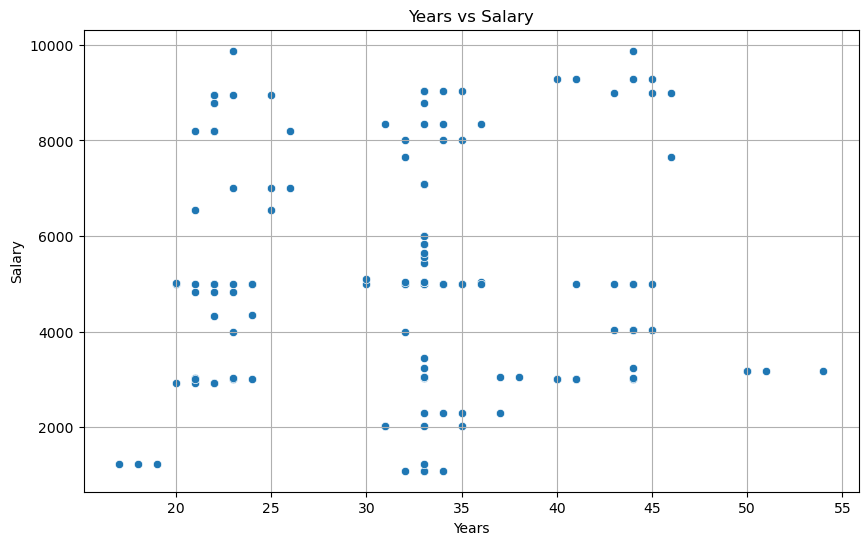

In [27]:
# --- 3. Data Analysis ---
print("\n--- 3. Data Analysis ---")

age_col = 'Years'
salary_col = 'Salary'

if age_col in df.columns and salary_col in df.columns:
    print(f"\n--- Filtering data with {age_col} > 40 and {salary_col} < 5000 ---")
    filtered_data = df[(df[age_col] > 40) & (df[salary_col] < 5000)]
    print(f"Number of records matching filter: {filtered_data.shape[0]}")
    print("Filtered Data Head:")
    print(filtered_data.head())
else:
    print(f"Skipping filtering: '{age_col}' or '{salary_col}' column not found after renaming.")

if age_col in df.columns and salary_col in df.columns:
    print(f"\n--- Plotting chart with {age_col} and {salary_col} (Scatter Plot) ---")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=age_col, y=salary_col, data=df)
    plt.title(f'{age_col} vs {salary_col}')
    plt.xlabel(age_col)
    plt.ylabel(salary_col)
    plt.grid(True)
    plt.show()
else:
    print(f"Skipping scatter plot: '{age_col}' or '{salary_col}' column not found.")




In [28]:
print("\n--- Counting number of people from each place and representing it visually (Bar Chart) ---")
if 'Place' in df.columns:
    # Ensure 'Place' column is treated as string for value_counts
    df['Place'] = df_['Place'].astype(str)
    place_counts = df['Place'].value_counts()
    print("Count of people from each place:")
    print(place_counts)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=place_counts.index, y=place_counts.values, palette='viridis')
    plt.title('Number of People from Each Place')
    plt.xlabel('Place')
    plt.ylabel('Number of People')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Skipping place count plot: 'Place' column not found.")



--- Counting number of people from each place and representing it visually (Bar Chart) ---
Skipping place count plot: 'Place' column not found.


In [29]:
# --- 4. Data Encoding ---
print("\n--- 4. Data Encoding ---")

# Identify categorical columns (excluding numerical columns, and columns that might be unique IDs)
# For 'Employee.csv', 'Company', 'Place', 'Country' are categorical. 'Gender' is already numerical (0/1).
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns identified for encoding: {categorical_cols}")



--- 4. Data Encoding ---
Categorical columns identified for encoding: ['Company', 'Location', 'Country']


In [48]:
# --- Label Encoding ---
print("\n--- Applying Label Encoding ---")
df_label_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[f'{col}_LabelEncoded'] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le
    print(f"  '{col}' encoded to '{col}_LabelEncoded'")

print("DataFrame after Label Encoding (showing new columns):")
print(df_label_encoded[[col for col in df_label_encoded.columns if 'LabelEncoded' in col or col in categorical_cols]].head())


--- Applying Label Encoding ---
  'Company' encoded to 'Company_LabelEncoded'
  'Location' encoded to 'Location_LabelEncoded'
  'Country' encoded to 'Country_LabelEncoded'
DataFrame after Label Encoding (showing new columns):
   Company  Location Country  Company_LabelEncoded  Location_LabelEncoded  \
0      TCS   Chennai   India                     4                      2   
1  Infosys    Mumbai   India                     2                      6   
2      TCS  Calcutta   India                     4                      1   
3  Infosys     Delhi   India                     2                      4   
4      TCS    Mumbai   India                     4                      6   

   Country_LabelEncoded  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


In [50]:
# --- One-Hot Encoding ---
print("\n--- Applying One-Hot Encoding ---")
# For One-Hot Encoding, it's common to drop the original categorical columns
# after encoding to avoid multicollinearity and redundancy.
df_one_hot_encoded = df.copy()
df_one_hot_encoded = pd.get_dummies(df_one_hot_encoded, columns=categorical_cols, drop_first=True) # drop_first=True to avoid multicollinearity
print("DataFrame after One-Hot Encoding (showing new and original columns):")
print(df_one_hot_encoded.head())
print(f"Shape after One-Hot Encoding: {df_one_hot_encoded.shape}")


--- Applying One-Hot Encoding ---
DataFrame after One-Hot Encoding (showing new and original columns):
   Years  Salary  Gender  Company_Congnizant  Company_Infosys  \
0   20.0  5000.0       0               False            False   
1   30.0  5000.0       0               False             True   
2   35.0  2300.0       0               False            False   
3   40.0  3000.0       0               False             True   
4   23.0  4000.0       0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   Location_Calcutta  Location_Chenn

In [52]:
# --- 5. Feature Scaling ---
print("\n--- 5. Feature Scaling ---")

# Identify numerical columns for scaling after encoding.
# We'll use the one-hot encoded dataframe for scaling as it's typically the final representation for ML.
# Exclude any non-numeric columns that might have slipped through (though get_dummies handles this well).
numerical_cols_for_scaling = df_one_hot_encoded.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical columns identified for scaling: {numerical_cols_for_scaling}")


--- 5. Feature Scaling ---
Numerical columns identified for scaling: ['Years', 'Salary', 'Gender']


In [54]:
# --- StandardScaler ---
print("\n--- Applying StandardScaler ---")
scaler_standard = StandardScaler()
# Fit and transform only the numerical columns
df_scaled_standard = df_one_hot_encoded.copy()
df_scaled_standard[numerical_cols_for_scaling] = scaler_standard.fit_transform(df_scaled_standard[numerical_cols_for_scaling])
print("DataFrame after StandardScaler (first 5 rows of scaled numerical features):")
print(df_scaled_standard[numerical_cols_for_scaling].head())
print(f"Min values after StandardScaler: \n{df_scaled_standard[numerical_cols_for_scaling].min()}")
print(f"Max values after StandardScaler: \n{df_scaled_standard[numerical_cols_for_scaling].max()}")
print(f"Mean values after StandardScaler: \n{df_scaled_standard[numerical_cols_for_scaling].mean()}")
print(f"Std Dev values after StandardScaler: \n{df_scaled_standard[numerical_cols_for_scaling].std()}")


--- Applying StandardScaler ---
DataFrame after StandardScaler (first 5 rows of scaled numerical features):
      Years    Salary    Gender
0 -1.484676 -0.100827 -0.534522
1 -0.267174 -0.100827 -0.534522
2  0.341577 -1.243735 -0.534522
3  0.950328 -0.947426 -0.534522
4 -1.119426 -0.524127 -0.534522
Min values after StandardScaler: 
Years    -1.849927
Salary   -1.756350
Gender   -0.534522
dtype: float64
Max values after StandardScaler: 
Years     2.654831
Salary    1.963179
Gender    1.870829
dtype: float64
Mean values after StandardScaler: 
Years     2.073958e-16
Salary    4.625929e-17
Gender    6.167906e-17
dtype: float64
Std Dev values after StandardScaler: 
Years     1.00349
Salary    1.00349
Gender    1.00349
dtype: float64


In [56]:
# --- MinMaxScaler ---
print("\n--- Applying MinMaxScaler ---")
scaler_minmax = MinMaxScaler()
# Fit and transform only the numerical columns
df_scaled_minmax = df_one_hot_encoded.copy()
df_scaled_minmax[numerical_cols_for_scaling] = scaler_minmax.fit_transform(df_scaled_minmax[numerical_cols_for_scaling])
print("DataFrame after MinMaxScaler (first 5 rows of scaled numerical features):")
print(df_scaled_minmax[numerical_cols_for_scaling].head())
print(f"Min values after MinMaxScaler: \n{df_scaled_minmax[numerical_cols_for_scaling].min()}")
print(f"Max values after MinMaxScaler: \n{df_scaled_minmax[numerical_cols_for_scaling].max()}")

print("\n--- EDA and Preprocessing Complete ---")
print("The processed dataframes are: df_processed (cleaned), df_label_encoded, df_one_hot_encoded, df_scaled_standard, df_scaled_minmax.")


--- Applying MinMaxScaler ---
DataFrame after MinMaxScaler (first 5 rows of scaled numerical features):
      Years    Salary  Gender
0  0.081081  0.445089     0.0
1  0.351351  0.445089     0.0
2  0.486486  0.137817     0.0
3  0.621622  0.217480     0.0
4  0.162162  0.331285     0.0
Min values after MinMaxScaler: 
Years     0.0
Salary    0.0
Gender    0.0
dtype: float64
Max values after MinMaxScaler: 
Years     1.0
Salary    1.0
Gender    1.0
dtype: float64

--- EDA and Preprocessing Complete ---
The processed dataframes are: df_processed (cleaned), df_label_encoded, df_one_hot_encoded, df_scaled_standard, df_scaled_minmax.
